In [4]:
import kwant
import kwant.continuum
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import scipy
from IPython.display import clear_output

%matplotlib notebook
import csv
from numpy import linalg as LA
import matplotlib as mpl
from pylab import *
from matplotlib.collections import LineCollection
import pylab as plb 

In [1]:
def make_system(a0,length,t_e,t_h,t_c,E,E_d,VG,gap,V_L,Vb,L_b):

    # system building
    lat = kwant.lattice.square(a=a0, norbs=2)
    syst = kwant.Builder()
    
    sz = np.array([[1, 0],[ 0, -1]])

    # central scattering region
    for j in range(length):
          
        syst[(lat(j, 0))] = np.array([[2*t_e-VG-E_d*(j/length)-E*((j-(length/2))/length)+gap, 0],[ 0, -2*t_h-E_d*(j/length)-VG-E*((j-(length/2))/length)]])
        
    for i in range(L_b):
        j=i+(length-L_b)/2
        syst[(lat(j, 0))] = np.array([[2*t_e+Vb-E_d*(j/length)-E*((j-(length/2))/length)+gap, 0],[ 0, -2*t_h-Vb-E_d*(j/length)-E*((j-(length/2))/length)]])
    
    syst[lat.neighbors()] = np.array([[-t_e, t_c],[ t_c, t_h]])

    #add leads
    sym = kwant.TranslationalSymmetry((-a0, 0))
    lead_left = kwant.Builder(sym)
    lead_left[lat(0, 0)] = np.array([[-2*t_h-V_L+gap+(E/2), 0],[ 0, 2*t_e-V_L+(E/2)]]) 
    lead_left[lat.neighbors()] = np.array([[-t_e, t_c],[ t_c, t_h]])
    syst.attach_lead(lead_left)

    sym = kwant.TranslationalSymmetry((a0, 0))
    lead_right = kwant.Builder(sym)
    lead_right[lat(0, 0)] = np.array([[2*t_e-V_L-(E_d)+gap-(E/2), 0],[ 0, -2*t_h-V_L-(E/2)-(E_d)]]) 
    lead_right[lat.neighbors()] = np.array([[-t_e, t_c],[ t_c, -t_h]])
    syst.attach_lead(lead_right)

    return syst

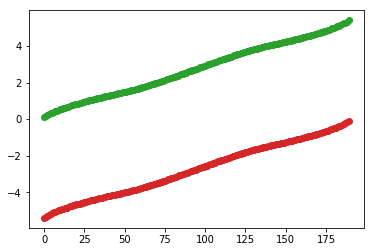

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


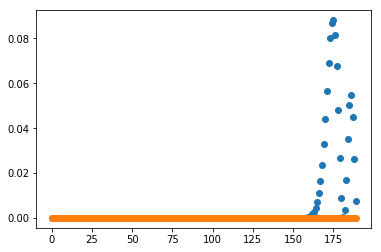

In [3]:
N=190
syst = make_system(a0=1.0,length=N,t_e=1,t_h=1,t_c=0,E=0.0,E_d=1.5,VG=0.0,gap=1.5,V_L=0.0,Vb=0.5,L_b=0).finalized()
ham = syst.hamiltonian_submatrix()
eigv,evecs = LA.eigh(ham)

im=[]
im2=[]

eigve=[]
eigvh=[]

#eveve=[[]]

#eveve = [[0 for i in range(N)] for y in range(N)] 
#evevh = [[0 for i in range(N)] for y in range(N)] 

eveve, evevh = evecs[::2], evecs[1::2]

#dE=eigv[N/2-1]

for i in range(2*N):
    im2.append(i)
    #print (i,eigv[i])#,evecs[:,i])

for i in range(N):
    im.append(i)
    eigvh.append(eigv[i])
    eigve.append(eigv[i+N])

#----------------------------------------    
plt.figure()

plt.plot(im,eigvh,'C3o')
plt.plot(im,eigve,'C2o')

#gca().set_ylim(-0.5,0.5)

plt.show()
#----------------------------------------

plt.figure()
#plt.plot(im,(eveve[:, 20+1]),'C0o')
#plt.plot(im,(evevh[:, 19-1]),'C1o')

plt.plot(im,(eveve[:, N+1])**2,'C0o')
plt.plot(im,(evevh[:, N])**2,'C1o')

plt.show()

In [5]:
fields = np.linspace(0.0,4.0,40)

fieldm=[]
epsig=[]
hpsig=[]
pos=[]

eigvem=[]
eigvhm=[]

eigve=[]
eigvh=[]

imm=[]
eigvm=[]
fieldmm=[]

for field in fields:
    N=100
    syst = make_system(a0=1.0,length=N,t_e=1,t_h=1,t_c=0,E=field,E_d=1.5,VG=0.2,gap=1.5,V_L=0.0,Vb=0.5,L_b=10).finalized()
    ham = syst.hamiltonian_submatrix()
    eigv,evecs = LA.eigh(ham)
    
    eveve, evevh = evecs[::2], evecs[1::2]
    
    for i in range(2*N):
        imm.append(i)
        eigvm.append(eigv[i])
        fieldmm.append(field)
    
    for i in range(N):
        fieldm.append(field)
        epsig.append((eveve[i, N])**2)
        hpsig.append((evevh[i, N-1])**2)
        pos.append(i)
        
        eigvh.append(eigv[i])
        eigve.append(eigv[i+N])
        
    eigvem.append(eigv[N])
    eigvhm.append(eigv[N-1])       

<IPython.core.display.Javascript object>


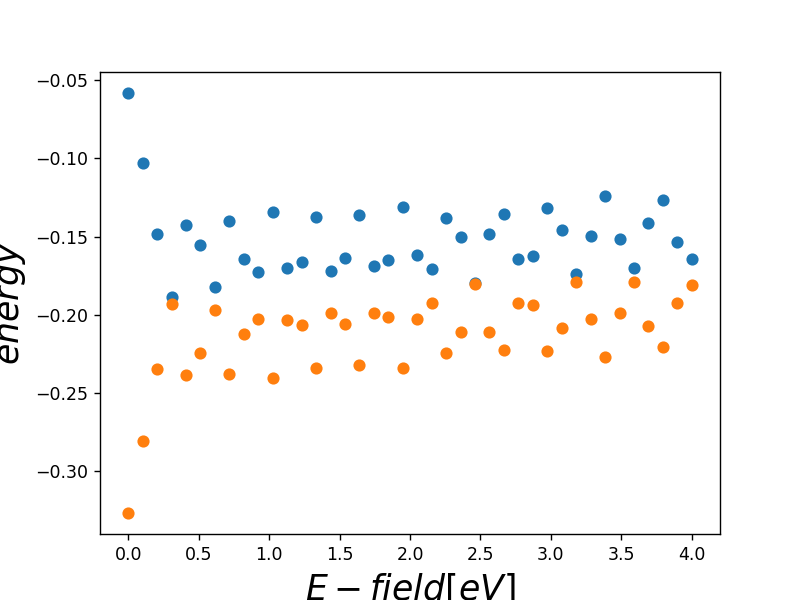

<IPython.core.display.Javascript object>


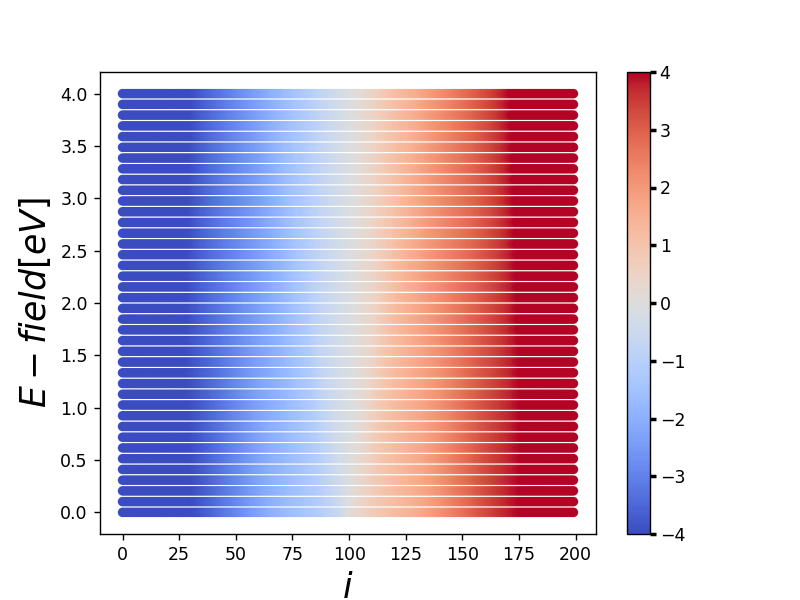

In [6]:
#---------------------------------------------------------------------------------------
# plotting the data:
#---------------------------------------------------------------------------------------

plt.figure()

plt.plot(fields,eigvem,'C0o')
plt.plot(fields,eigvhm,'C1o')
#plt.plot([-2,0.5], [0.0,0.0], 'C5-', lw=3.8)

plt.xlabel("$E-field [eV]$",fontsize=20)
plt.ylabel("$energy$",fontsize=20)

savefig('E-comp_eh.pdf')
plt.show()

#-------------------------------------------------------------------------------
plt.figure()        

cmap = plt.get_cmap('coolwarm')

plt.scatter(imm, fieldmm, c=eigvm, vmin=-4.0, vmax=4.0, s=20, cmap=cmap)   

plt.ylabel("$E-field [eV]$",fontsize=20)
plt.xlabel("$i$",fontsize=20)

#gca().set_ylim(-0.1,0.1)
#gca().set_xlim(-0.2,2.0)

#plt.title('$V^e_G=V^h_G=0.2 eV,V_b=0.5 eV,L_b=10 nm,L_w=120 nm$')

cbar = plt.colorbar()

cbar.ax.tick_params(labelsize= 10, pad=2, width=2)

plt.show()
#----------------------------------------------------------------

<IPython.core.display.Javascript object>


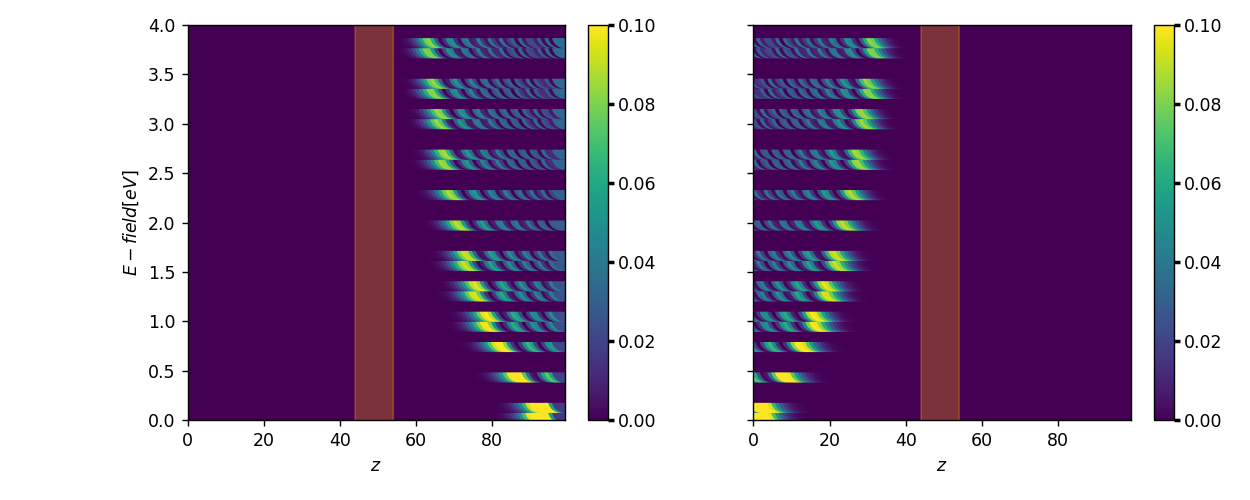

/usr/lib/python3/dist-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
#-------------------------------------------------------------------------------
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'hspace':0}, figsize=(10, 4))        

cmap = plt.get_cmap('viridis')

ax1= plt.subplot(121)

plt.scatter(pos, fieldm, c=epsig, vmin=0.0, vmax=0.1, s=200, cmap=cmap)   

plt.ylabel("$E-field [eV]$",fontsize=10)
plt.xlabel("$z$",fontsize=10)
gca().set_xlim(0.0,99)
gca().set_ylim(0.0,4.0)

#plt.title('$V^e_G=V^h_G=0.2 eV,V_b=0.5 eV,L_b=10 nm,L_w=120 nm$')


cbar = plt.colorbar()

cbar.ax.tick_params(labelsize= 10, pad=2, width=2)

z=np.arange(44,54,0.01)
plt.fill_between(z,-2.0,4.0, color='orange', alpha=0.3) 
#----------------------------------------------------------------
ax2= plt.subplot(122)

plt.scatter(pos, fieldm, c=hpsig, vmin=0.0, vmax=0.1, s=200, cmap=cmap)   

#plt.ylabel("$E-field [eV]$",fontsize=20)
plt.xlabel("$z$",fontsize=10)
gca().set_xlim(0.0,99)
gca().set_ylim(0.0,4.0)

plt.setp(ax2.get_yticklabels(), visible=False)

#plt.title('$V^e_G=V^h_G=0.2 eV,V_b=0.5 eV,L_b=10 nm,L_w=120 nm$')


cbar = plt.colorbar()

cbar.ax.tick_params(labelsize= 10, pad=2, width=2)

z=np.arange(44,54,0.01)
plt.fill_between(z,-2.0,4.0, color='orange', alpha=0.3) 
#----------------------------------------------------------------
plt.subplots_adjust(left=0.15, right=0.98, top=0.95, bottom=0.16)
f.subplots_adjust(hspace=0)
savefig('LDOS.pdf')
plt.show()

<IPython.core.display.Javascript object>


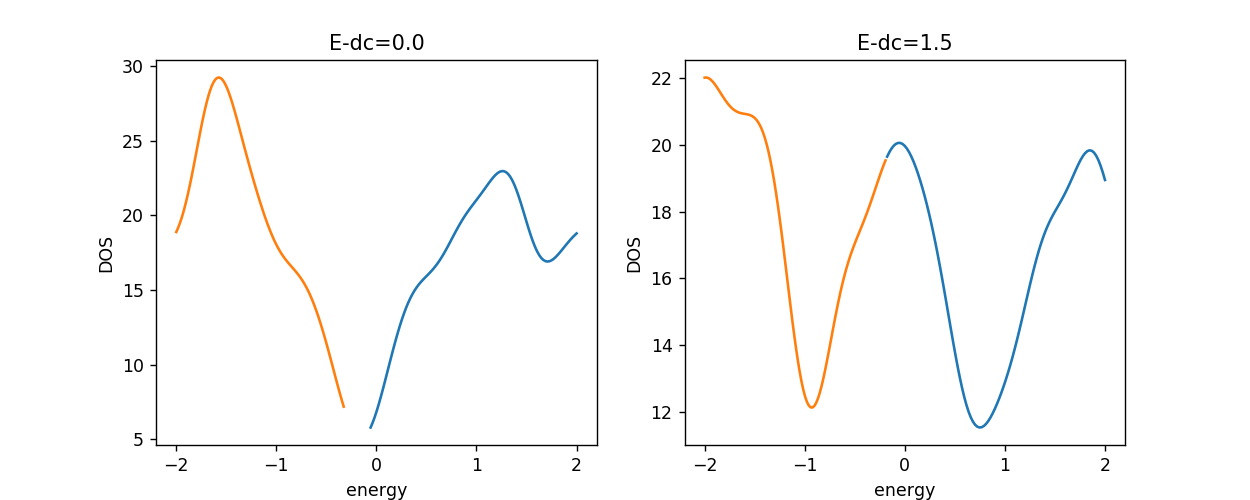

In [8]:
fields = np.linspace(-1.5,1.0,1)

fieldm=[]
epsig=[]
hpsig=[]
pos=[]

eigvem=[]
eigvhm=[]

eigve=[]
eigvh=[]

imm=[]
eigvm=[]
fieldmm=[]

#plt.figure()

f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'hspace':0}, figsize=(10, 4))  

ax1= plt.subplot(121)

for field in fields:
    N=100
    syst = make_system(a0=1.0,length=N,t_e=1,t_h=1,t_c=0,E=0.0,E_d=1.5,VG=0.2,gap=1.5,V_L=0.0,Vb=0.5,L_b=10).finalized()
    
    ham = syst.hamiltonian_submatrix()
    eigv,evecs = LA.eigh(ham)
    
    for i in range(N):
        eigvh.append(eigv[i])
        eigve.append(eigv[i+N])
        
    spectrum = kwant.kpm.SpectralDensity(syst, rng=0)
    energies, densities = spectrum()    
        
    energy_subset_h = np.linspace(-2, eigv[N-1],100)
    density_subset_h = spectrum(energy_subset_h)
    
    spectrum = kwant.kpm.SpectralDensity(syst, rng=0)
    energies, densities = spectrum() 
    
    energy_subset_e = np.linspace(eigv[N], 2,100)
    density_subset_e = spectrum(energy_subset_e)

    
    plt.plot(energy_subset_h,density_subset_h,'C1-')
    plt.plot(energy_subset_e,density_subset_e,'C0-')
    
    plt.xlabel("energy",fontsize=10)
    plt.ylabel("DOS",fontsize=10)
    plt.title("E-dc=0.0")
#--------------------------------------------------------------------------------
ax1= plt.subplot(122)

for field in fields:
    N=100
    syst = make_system(a0=1.0,length=N,t_e=1,t_h=1,t_c=0,E=1.5,E_d=1.5,VG=0.2,gap=1.5,V_L=0.0,Vb=0.5,L_b=10).finalized()
    
    ham = syst.hamiltonian_submatrix()
    eigv,evecs = LA.eigh(ham)
    
    for i in range(N):
        eigvh.append(eigv[i])
        eigve.append(eigv[i+N])
        
    spectrum = kwant.kpm.SpectralDensity(syst, rng=0)
    energies, densities = spectrum()    
        
    energy_subset_h = np.linspace(-2, eigv[N-1],100)
    density_subset_h = spectrum(energy_subset_h)
    
    spectrum = kwant.kpm.SpectralDensity(syst, rng=0)
    energies, densities = spectrum() 
    
    energy_subset_e = np.linspace(eigv[N], 2,100)
    density_subset_e = spectrum(energy_subset_e)

    
    plt.plot(energy_subset_h,density_subset_h,'C1-')
    plt.plot(energy_subset_e,density_subset_e,'C0-')
    
    plt.xlabel("energy",fontsize=10)
    plt.ylabel("DOS",fontsize=10)
    plt.title("E-dc=1.5")
#--------------------------------------------------------------------------------
plt.show()   

In [69]:
#with open('double_well_Vb=0_Lb=1_a=1.txt', 'w') as f:
    N=190
    a=1.0
    L=a*N
    t0=25.0/(a*a)
    #fields = []
    data = []

    energies = np.linspace(0.0,4.0,100)

    for energy in energies:

        syst = make_system(a0=a,length=N,t_e=25,t_h=3,t_c=0,E=0.0,E_d=1.5,VG=2.5,gap=1.5,V_L=0.0,Vb=0.7,L_b=10).finalized()

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst,energy)

        # compute the transmission probability from lead 0 to
        # lead 1
        #field=field/t0
        #fields.append(field)
        data.append(smatrix.transmission(1, 0))
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

<IPython.core.display.Javascript object>


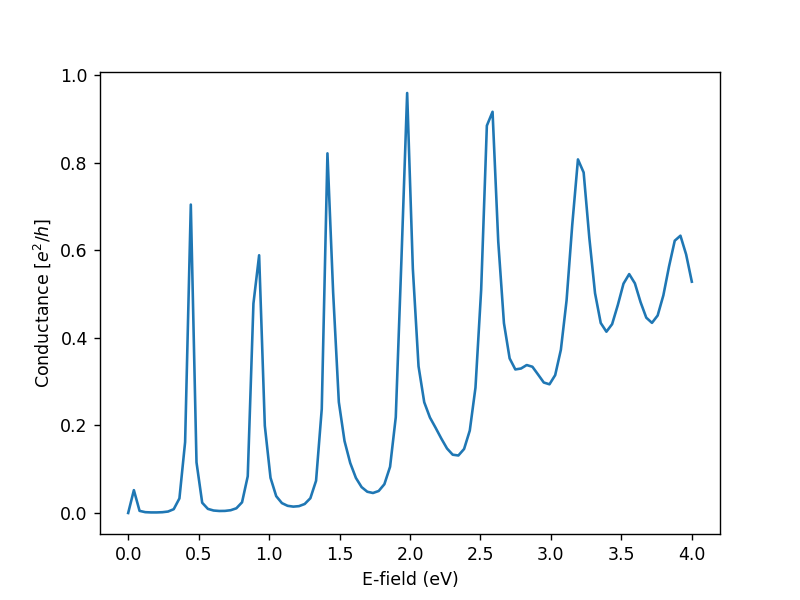

In [70]:
plt.figure()

plt.plot(energies,data)

#plt.yscale('log')
#plt.rcParams['figure.figsize']=[30/2.54,24/2.54]
plt.xlabel("E-field (eV)")
plt.ylabel("Conductance [$e^2/h$]")
#plt.legend(['$L_w=150 nm$','$L_w=120 nm$','$L_w=90 nm$' , '$L_w=60 nm$'])
#plt.title('$V_G^e=V_G^h=0.2 eV,V_b=0.5 eV,L_b=10 nm$')
#gca().set_xlim(0.0,4.0)

plt.show()
#savefig('con_eh.pdf')

<IPython.core.display.Javascript object>


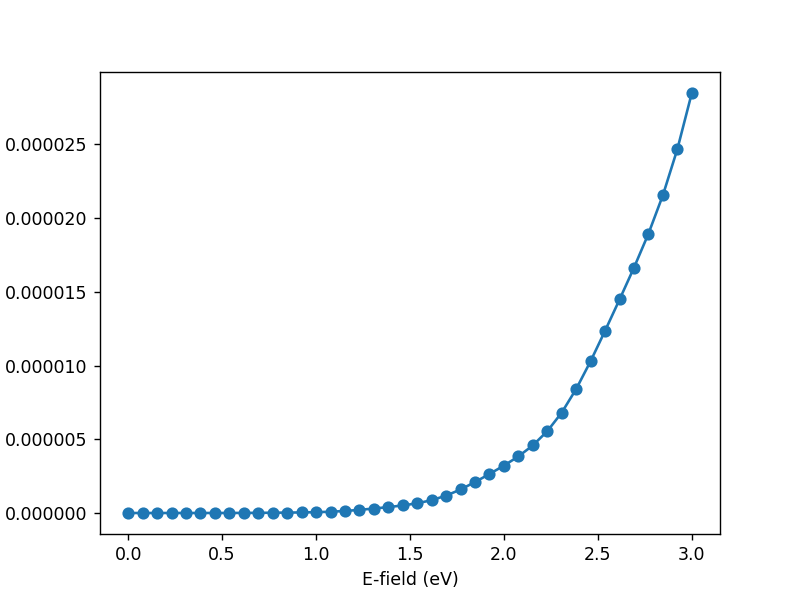

<IPython.core.display.Javascript object>


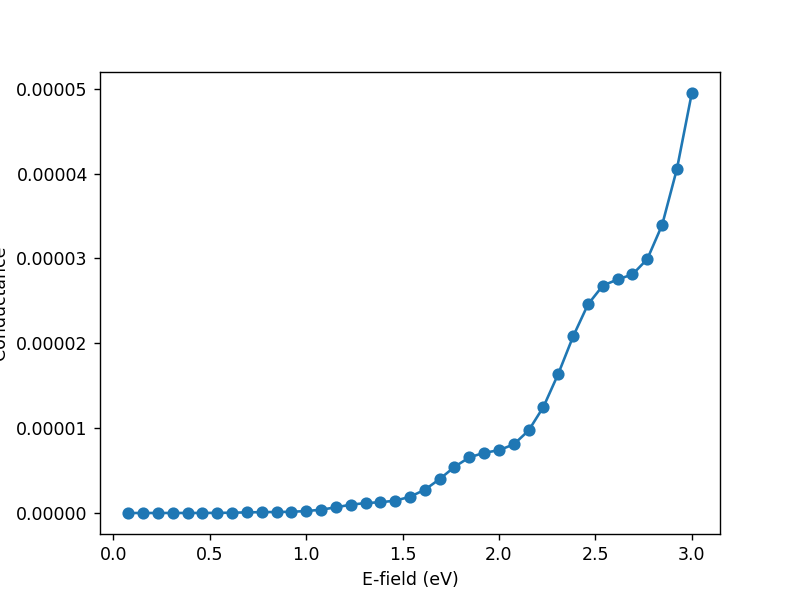

In [106]:
N=102
a=1.0
L=a*N
t0=25.0/(a*a)

current=[]
conductance=[]
vol=[]

fields = np.linspace(0.0,3.0,40)

icount=-1

for field in fields:

    icount=icount+1
    
    syst = make_system(a0=a,length=N,t_e=25,t_h=3,t_c=0,E=field,E_d=1.5,VG=0.4,gap=1.5,V_L=0.0,Vb=0.5,L_b=0).finalized()
    #syst = make_system(a0=a,length=N,t_e=1,t_h=1.001,t_c=0,E=field,E_d=0.0,VG=0.0,gap=1.5,V_L=0.0,Vb=0.7,L_b=5).finalized()
    
    data = []
    x=[]
    
    #print (max(2,int(field/0.01)))
    
    N_i=max(2,int(field/0.02))
    
    for i in range(N_i):

        energy_e = -(field/2.0) + (field*i/(N_i-1))

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst,energy_e)

        x.append(energy_e)

        data.append(smatrix.transmission(1, 0))
    
    z= scipy.integrate.simps(data, x=None, dx=field/(N_i-1), axis=-1, even='avg')
    
    current.append(z)
    
    if icount>0 :
        con=(current[icount]- current[icount-1])/(fields[icount]-fields[icount-1])
        conductance.append(con)
        vol.append(fields[icount])
    
    
    #print (field,z)
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))
        

#---------------------------------------        
plt.figure()

plt.plot(fields,current,'C0o-')

plt.xlabel("E-field (eV)")
plt.ylabel("Current")

plt.show()        

#---------------------------------------        
plt.figure()

plt.plot(vol,conductance,'C0o-')

plt.xlabel("E-field (eV)")
plt.ylabel("Conductance")

plt.show()  

In [109]:
N=102
a=1.0
L=a*N
t0=25.0/(a*a)

current2=[]
conductance2=[]
vol2=[]

fields = np.linspace(0.0,3.0,40)

icount=-1

for field in fields:

    icount=icount+1
    
    syst = make_system(a0=a,length=N,t_e=25,t_h=3,t_c=0,E=field,E_d=1.5,VG=0.4,gap=1.5,V_L=0.0,Vb=0.5,L_b=2).finalized()
    #syst = make_system(a0=a,length=N,t_e=1,t_h=1.001,t_c=0,E=field,E_d=0.0,VG=0.0,gap=1.5,V_L=0.0,Vb=0.7,L_b=5).finalized()
    
    data = []
    x=[]
    
    #print (max(2,int(field/0.01)))
    
    N_i=max(2,int(field/0.02))
    
    for i in range(N_i):

        energy_e = -(field/2.0) + (field*i/(N_i-1))

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst,energy_e)

        x.append(energy_e)

        data.append(smatrix.transmission(1, 0))
    
    z= scipy.integrate.simps(data, x=None, dx=field/(N_i-1), axis=-1, even='avg')
    
    current2.append(z)
    
    if icount>0 :
        con=(current2[icount]- current2[icount-1])/(fields[icount]-fields[icount-1])
        conductance2.append(con)
        vol2.append(fields[icount])
    
    
    #print (field,z)
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

<IPython.core.display.Javascript object>


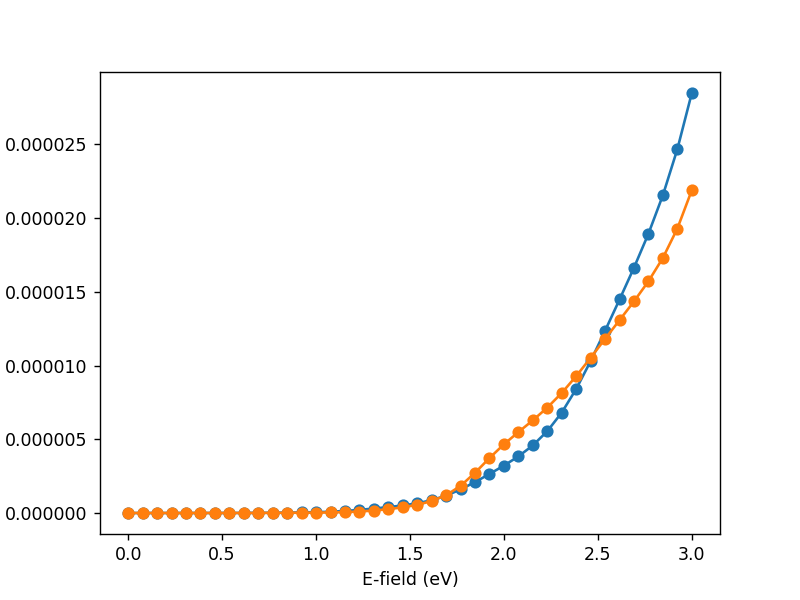

<IPython.core.display.Javascript object>


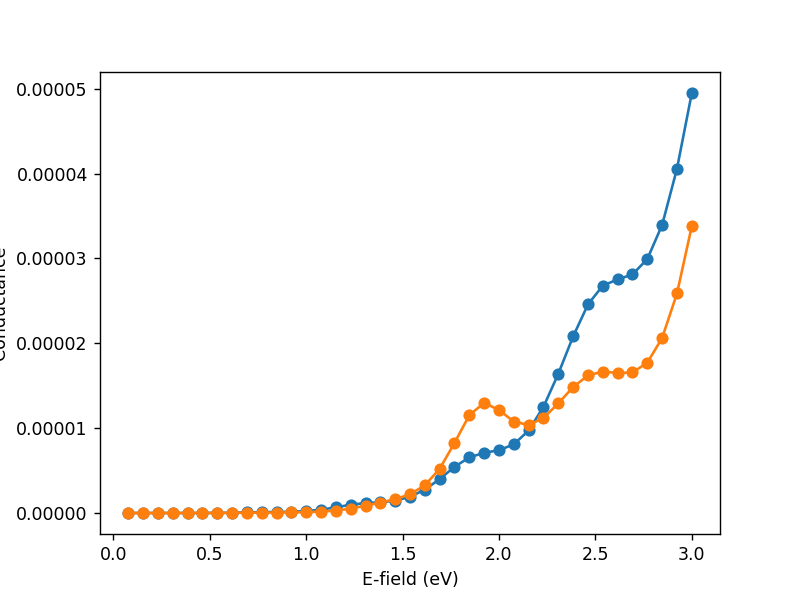

In [110]:
#---------------------------------------        
plt.figure()

plt.plot(fields,current,'C0o-')
plt.plot(fields,current2,'C1o-')

plt.xlabel("E-field (eV)")
plt.ylabel("Current")

plt.show()        

#---------------------------------------        
plt.figure()

plt.plot(vol,conductance,'C0o-')
plt.plot(vol2,conductance2,'C1o-')

plt.xlabel("E-field (eV)")
plt.ylabel("Conductance")

plt.show()  

In [111]:
N=142
a=1.0
L=a*N
t0=25.0/(a*a)

current3=[]
conductance3=[]
vol2=[]

fields = np.linspace(0.0,3.0,40)

icount=-1

for field in fields:

    icount=icount+1
    
    syst = make_system(a0=a,length=N,t_e=25,t_h=3,t_c=0,E=field,E_d=1.5,VG=0.4,gap=1.5,V_L=0.0,Vb=0.5,L_b=2).finalized()
    #syst = make_system(a0=a,length=N,t_e=1,t_h=1.001,t_c=0,E=field,E_d=0.0,VG=0.0,gap=1.5,V_L=0.0,Vb=0.7,L_b=5).finalized()
    
    data = []
    x=[]
    
    #print (max(2,int(field/0.01)))
    
    N_i=max(2,int(field/0.02))
    
    for i in range(N_i):

        energy_e = -(field/2.0) + (field*i/(N_i-1))

        # compute the scattering matrix at a given energy
        smatrix = kwant.smatrix(syst,energy_e)

        x.append(energy_e)

        data.append(smatrix.transmission(1, 0))
    
    z= scipy.integrate.simps(data, x=None, dx=field/(N_i-1), axis=-1, even='avg')
    
    current3.append(z)
    
    if icount>0 :
        con=(current3[icount]- current3[icount-1])/(fields[icount]-fields[icount-1])
        conductance3.append(con)
        vol2.append(fields[icount])
    
    
    #print (field,z)
        #f.write('{} {}\n'.format(energy, smatrix.transmission(1, 0)))

<IPython.core.display.Javascript object>


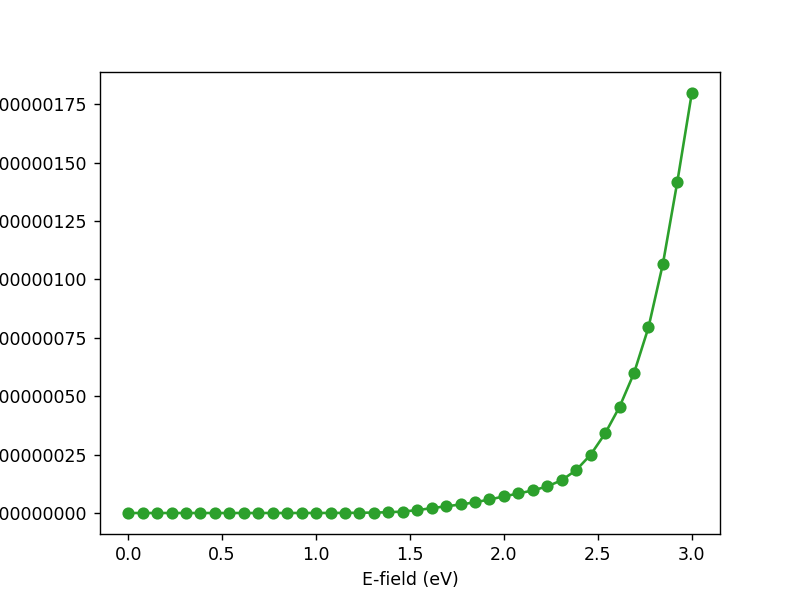

<IPython.core.display.Javascript object>


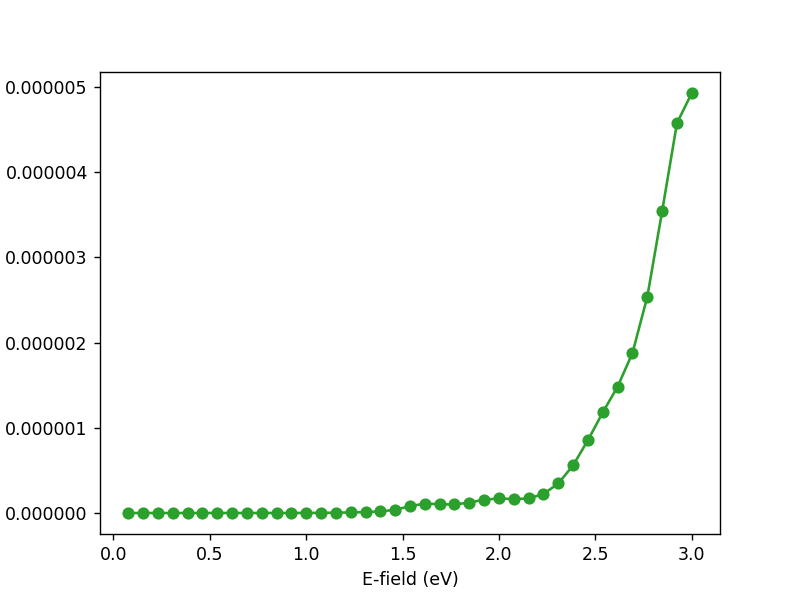

In [114]:
#---------------------------------------        
plt.figure()

#plt.plot(fields,current2,'C1o-')
plt.plot(fields,current3,'C2o-')

plt.xlabel("E-field (eV)")
plt.ylabel("Current")

plt.show()        

#---------------------------------------        
plt.figure()

#plt.plot(vol2,conductance2,'C1o-')
plt.plot(vol2,conductance3,'C2o-')

plt.xlabel("E-field (eV)")
plt.ylabel("Conductance")

plt.show()  